**<font size="5">ABHISHEK KUMAR SINGH</font>**

**<font size="5">2K19/CO/021</font>**

# <font size="8"><center>EXPERIMENT - 8</center></font>

**AIM:** To write a python program to implement K-Means Clustering Algorithm.

**THEORY**

**Clustering**

Clustering is a type of unsupervised learning which is used to split unlabeled data into different groups. Unlabeled data means we don’t have a dependent variable (response variable) for the algorithm to compare as the ground truth.
We try to split the dataset into different groups, such that the data points in the same group have similar characteristics than the data points in different groups.

Use a good distance metric to compute the distance between a point and every other point. The points that have less distance are more similar.
Euclidean distance is the most common metric. The formula for Euclidean distance is given by:

![Euclidean_distance](Euclidean_distance.png)

Clustering algorithms are generally used in network traffic classification, customer, and market segmentation. It can be used on any tabular dataset, where you want to know which rows are similar to each other and form meaningful groups out of the dataset.

![Before_Clustering](Before_Clustering.png)

![After_Clustering](After_Clustering.png)

**K- means clustering**

K- means is an unsupervised partitional clustering algorithm that is based on grouping data into k – numbers of clusters by determining centroid using the Euclidean or Manhattan method for distance calculation. It groups the object based on minimum distance.

**K- means clustering Steps**

1. First,  initialize the number of clusters, K (Elbow method is generally used in selecting the number of clusters).

2. Randomly select the k data points for centroid. A centroid is the imaginary or real location representing the center of the cluster.

3. Categorize each data items to its closest centroid and update the centroid coordinates calculating the average of items coordinates categorized in that group so far.

4. Repeat the process for a number of iterations till successive iterations clusters data items into the same group.

**CODE AND OUTPUT:**

In [6]:
# Making the imports

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math

In [7]:
#  Building the Model

class K_Means:
    
    def __init__(self, k=2, tolerance = 0.001, max_iter = 500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
    
    def euclidean_distance(self, point1, point2):
        #return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)   #sqrt((x1-x2)^2 + (y1-y2)^2)
        return np.linalg.norm(point1-point2, axis=0)
        
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        for i in range(self.max_iterations):
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []
                
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
            
            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)
            

                
            isOptimal = True
            
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break

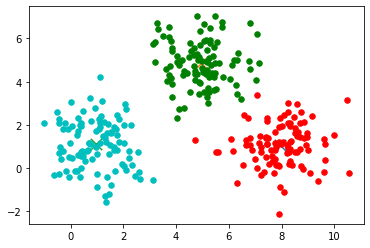

In [5]:
K=3
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
cluster_1 = np.random.randn(100, 2) + center_1
cluster_2 = np.random.randn(100,2) + center_2
cluster_3 = np.random.randn(100,2) + center_3

data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)
    
k_means = K_Means(K)
k_means.fit(data)
    
    
# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

for centroid in k_means.centroids:
    plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

for cluster_index in k_means.classes:
    color = colors[cluster_index]
    for features in k_means.classes[cluster_index]:
        plt.scatter(features[0], features[1], color = color,s = 30)

**LEARNING OUTCOMES**

We learnt about the K-Means Clustering Algorithm and its implementation in python.